# 1. Hipótese: O Aumento da Renda Aumenta a Demanda por Energia

A relação entre o consumo de energia e o crescimento econômico tem sido um tópico de grande interesse e relevância no âmbito das pesquisas sobre desenvolvimento sustentável e políticas energéticas. Neste estudo, buscamos explorar e quantificar a correlação entre o consumo de energia primária e o Produto Interno Bruto (PIB) per capita, representando, respectivamente, a demanda por energia e o nível de renda de uma nação.<br>

A fundamentação teórica apoia-se no conceito de que, à medida que a renda de um país aumenta, seu consumo de energia tende a crescer, impulsionado por uma maior demanda industrial, comercial e doméstica, o que por conseguinte, exige um maior uso de energia. A energia é um pilar fundamental para o desenvolvimento econômico, e um aumento na renda per capita geralmente reflete em um aumento no padrão de vida e, consequentemente, em um maior consumo de energia.<br>

Usando o modelo Cobb-Douglas e o equilíbrio de mercado, temos que maior consumo aumenta a produção. No longo prazo, onde K será variável, isso implica em mais energia dispendida na fabricação e disponibilização de bens e serviços. <br>

\begin {equation}
Y = A \cdot K^{\alpha} \cdot L^{\beta}
\end {equation}

Se consideramos energia como um fator especifico, para manter todos os demais elementos de K constantes, temos: 

\begin {equation}
Y = A \cdot K^{\alpha} \cdot L^{\beta} \cdot E^{\gamma}
\end {equation}

Neste estudo, o modelo de demanda por energia examina a relação entre o PIB e o consumo de energia. A ideia central é que a demanda por energia não é apenas uma função do tamanho e do crescimento da economia, mas também de outros fatores como a eficiência energética, políticas governamentais, avanços tecnológicos e mudanças no comportamento dos consumidores. No entanto, o foco deste projeto está em entender até que ponto a renda, medida pelo PIB per capita, influencia essa demanda.<br>

**Fonte:** Global Data on Sustainable Energy <br>
https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy 

# 2. Carga das Ferramentas

In [83]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [84]:
# Carregando o dataset
path_dataset = r'https://raw.githubusercontent.com/Felipefalex/Projeto-Sustainable-Energy/main/global-data-on-sustainable-energy%20(1).csv'
data = pd.read_csv(path_dataset)

# Exibindo as primeiras linhas do dataset para inspeção inicial
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000.0,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
1,Afghanistan,2001.0,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.93911,67.709953
2,Afghanistan,2002.0,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.93911,67.709953
3,Afghanistan,2003.0,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.93911,67.709953
4,Afghanistan,2004.0,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.93911,67.709953


# 3. Análise dos Dados

A primeira fase do projeto é a análise da estrutura dos dados: quais são as informações disponíveis, como estão elencadas e qual seu comportamento.

In [85]:
# Tamanho do dataset e tipos de dados de cada coluna
dataset_info = data.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3544 non-null   float64
 2   Access to electricity (% of population)                           3534 non-null   float64
 3   Access to clean fuels for cooking                                 3375 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2634 non-null   float64
 5   Financial flows to developing countries (US $)                    1529 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3355 non-null   float64
 7   Electricity from fossil fuels (TW

In [86]:
# Quantidade e nome dos países
nomes_paises = data['Entity'].unique()
quantidade_paises = len(data['Entity'].unique())

print(quantidade_paises)
print('\n')
print(nomes_paises)

276


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas'
 'Bahrain,2000,100,100,0,,0,13.02,0,0,0,157253.03,10.43,15880,,5.300070056,13636.41675,"2,239",765,26.0667,50.5577'
 'Bahrain,2001,100,100,0,,0,13.74,0,0,0,158559.69,10.41,16390,,2.490948108,12868.17692,"2,239",765,26.0667,50.5577'
 'Bahrain,2002,100,100,0,,0,14.34,0,0,0,165096.56,10.45,17219.99931,,3.348550668,13049.90973,"2,239",765,26.0667,50.5577'
 'Bahrain,2003,100,100,0,,0,14.76,0,0,0,165859.02,10.3,17940.00053,,6.296441979,14222.0368,"2,239",765,26.0667,50.5577'
 'Bahrain,2004,100,100,0,,0,15.18,0,0,0,160432.52,9.83,17930.00031,,6.980960594,15846.50595,"2,239",765,26.0667,50.5577'
 'Bahrain,2005,100,100,0,,0,18.2,0,0,0,166315.33,10.55,20690.00053,,6.768997871,17959.39683,"2,239",765,26.0667,50.5577'
 'Bahrain,2006,100,100,0,,0,19.77,0,0,0,164833.39,10.36,22489.99977,,6.467000122,19307.50894,"2,239",765,26.0667,50.5577'
 'Bahrain,200

In [87]:
# Valores vazios
vazios = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
vazios = vazios.rename(columns = {0 : 'Null Values'})
vazios

,Null Values
Renewables (% equivalent primary energy),2179
Financial flows to developing countries (US $),2120
Renewable-electricity-generating-capacity-per-capita,1015
Value_co2_emissions_kt_by_country,528
gdp_growth,422
gdp_per_capita,387
Energy intensity level of primary energy (MJ/$2017 PPP GDP),307
Renewable energy share in the total final energy consumption (%),294
Access to clean fuels for cooking,274
Electricity from nuclear (TWh),231


In [88]:
# Colunas de interesse
variáveis_chave = [
    'Renewable energy share in the total final energy consumption (%)',
    'gdp_per_capita',
    'gdp_growth',
]

In [89]:
# Calculando o número de informações faltantes por país para cada coluna de interesse
valores_faltantes_pais = data[variáveis_chave].isnull().sum(axis=1).groupby(data['Entity']).sum()
valores_faltantes_pais = valores_faltantes_pais.sort_values(ascending=False)

# Exibindo o total de dados faltantes por coluna
print(valores_faltantes_pais.head(25))

Entity
Kyrgyzstan                                                                                                                                       43
Gambia                                                                                                                                           43
Saint Kitts and Nevis                                                                                                                            43
Egypt                                                                                                                                            43
Congo                                                                                                                                            43
Bahamas                                                                                                                                          43
Saint Vincent and the Grenadines                                                                         

In [90]:
# Remoção das informações faltantes
# Lista de países a serem removidos
paises_para_remover = [
    "Egypt", "Saint Vincent and the Grenadines", "Saint Lucia", 
    "Saint Kitts and Nevis", "Gambia", "Bahamas", "New Caledonia", 
    "Czechia", "Kyrgyzstan", "Slovakia", "Congo", "Yemen", 
    "Cayman Islands", "Somalia", "Aruba", "Bulgaria", "Bermuda", 
    "Puerto Rico", "Lebanon", "Libya", "Albania", "Eritrea", 
    "Nauru", "Djibouti"
]

# Removendo os países especificados do dataframe
data = data[~data['Entity'].isin(paises_para_remover)]

In [91]:
# Analisando após a remoção
valores_faltantes_pais = data[variáveis_chave].isnull().sum(axis=1).groupby(data['Entity']).sum()
valores_faltantes_pais = valores_faltantes_pais.sort_values(ascending=False)
print(valores_faltantes_pais.head(10))

Entity
South Sudan                                                                                                                 11
Afghanistan                                                                                                                  6
Sao Tome and Principe                                                                                                        4
Malta,2004,100,100,,,0.12,2.22,0,0,0,59390.21,3.07,2599.999905,,0.140268127,15197.05671,"1,380",316,35.937496,14.375416      3
Maldives,2020,100,99.2,31.1,,,0.57,0,0.04,6.557377,17308.588,,,,-33.4999021,6924.105745,"1,802",298,3.202778,73.22068        3
Malta,2000,100,100,,,0,1.92,0,0,0,46378.05,2.64,2130,,19.6812701,10432.32812,"1,380",316,35.937496,14.375416                 3
Malta,2001,100,100,,,0,1.94,0,0,0,50713.89,3.11,2490,,-1.174697348,10402.23337,"1,380",316,35.937496,14.375416               3
Malta,2002,100,100,,,0.09,2.05,0,0,0,49170.387,2.83,2319.999933,,2.565263253,11289.88984,"1,380",316,35.

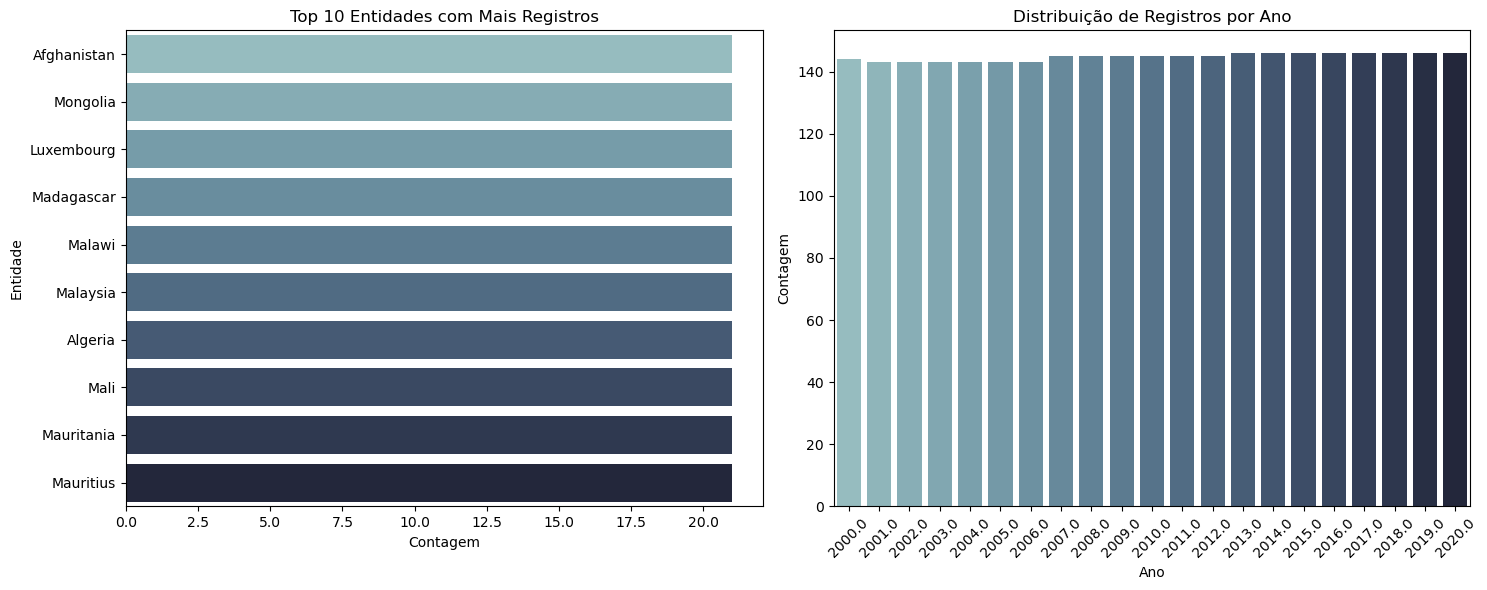

,count,mean,std,min,25%,50%,75%,max
Year,3040.0,2010.05,6.050000e+00,2000.00,2005.00,2010.00,2015.00,2.020000e+03
Access to electricity (% of population),3030.0,77.50,3.130000e+01,1.25,56.13,97.55,100.00,1.000000e+02
Access to clean fuels for cooking,3039.0,62.66,3.893000e+01,0.00,23.80,82.10,100.00,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2235.0,122.05,2.588900e+02,0.00,6.32,37.26,118.89,3.060190e+03
Financial flows to developing countries (US $),1410.0,98111078.01,3.064489e+08,0.00,280000.00,6080000.00,58357500.00,5.202310e+09
Renewable energy share in the total final energy consumption (%),2895.0,35.60,2.978000e+01,0.00,9.36,28.56,59.90,9.604000e+01
Electricity from fossil fuels (TWh),3019.0,81.84,3.803300e+02,0.00,0.32,3.47,30.82,5.184130e+03
Electricity from nuclear (TWh),2914.0,15.84,8.002000e+01,0.00,0.00,0.00,0.00,8.094100e+02
Electricity from renewables (TWh),3019.0,28.43,1.139500e+02,0.00,0.14,2.33,12.61,2.184940e+03
Low-carbon electricity (% electricity),3019.0,40.52,3.391000e+01,0.00,8.50,35.97,67.12,1.000000e+02


In [92]:
# Estatísticas descritivas das variáveis numéricas
estatisticas_numericas = data.describe().round(2).T

# Visualização da distribuição das principais variáveis categóricas
# Países com maiores números de registros
cores_paises = sns.cubehelix_palette(10, rot=-.25, light=.7)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(y=data['Entity'], order=data['Entity'].value_counts().index[:10], palette=cores_paises)
plt.title('Top 10 Entidades com Mais Registros')
plt.ylabel('Entidade')
plt.xlabel('Contagem')

# Distribuição de registros por ano
cores_anos = sns.cubehelix_palette(21, rot=-.25, light=.7)
plt.subplot(1, 2, 2)
sns.countplot(x=data['Year'], palette=cores_anos)
plt.title('Distribuição de Registros por Ano')
plt.ylabel('Contagem')
plt.xlabel('Ano')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

estatisticas_numericas

`Ano`: Os dados abrangem de 2000 a 2020. A distribuição de registros por ano é bastante uniforme, indicando que a maioria dos anos tem uma quantidade similar de dados.<br>
`Acesso à Eletricidade`: Em média, 77.96% da população tinha acesso à eletricidade, com uma variação considerável (desvio padrão de 31%).<br>
`Acesso a Combustíveis Limpos para Cozinhar`: Média de 63.24% com alta variação (desvio padrão de 39%).<br>
`Capacidade de Geração de Eletricidade Renovável Per Capita`: Média de 118.12, mas com grande variação (desvio padrão de 254), indicando diferenças significativas entre países.<br>
`Fluxos Financeiros para Países em Desenvolvimento`: Média alta com um desvio padrão muito grande, sugerindo uma distribuição bastante desigual desses fluxos.<br>
`Consumo de Energia Primária Per Capita`: Os dados variam significativamente entre os países.<br>
`Emissões de CO2`: Variação substancial nas emissões de CO2 entre os países.<br>
`Países`: O gráfico mostra as 10 entidades (países) com mais registros no dataset. Isso pode ser útil para entender quais países têm dados mais completos ou estão mais frequentemente representados.

In [93]:
# Tratamento de valores faltantes
# Substituindo valores faltantes por zeros em colunas financeiras e de energia
colunas_a_preencher = [
    'Financial flows to developing countries (US $)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)'
]

data[colunas_a_preencher] = data[colunas_a_preencher].fillna(0)

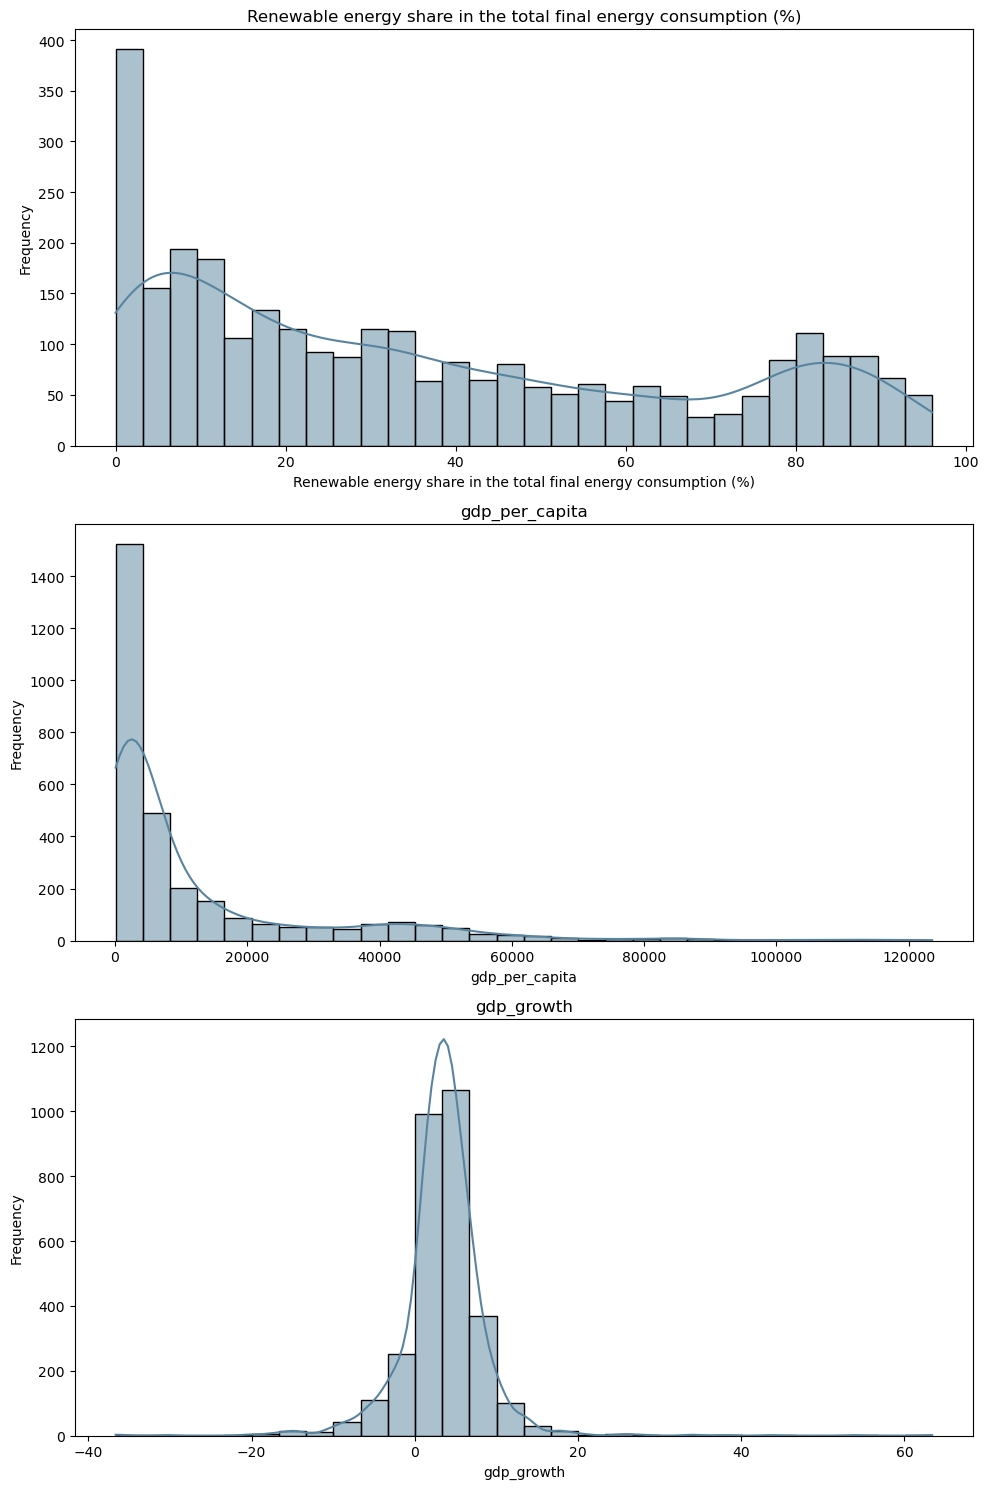

In [94]:
# Visualização Gráfica das Principais Variáveis
# Criando histogramas para cada variável selecionada
cores_hist = sns.cubehelix_palette(rot=-.25, light=.7)
fig, axes = plt.subplots(len(variáveis_chave), 1, figsize=(10, 5 * len(variáveis_chave)))

for i, col in enumerate(variáveis_chave):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True, color=cores_hist[2])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

A maioria das variáveis exibe uma distribuição assimétrica, indicando uma concentração de valores.<br>

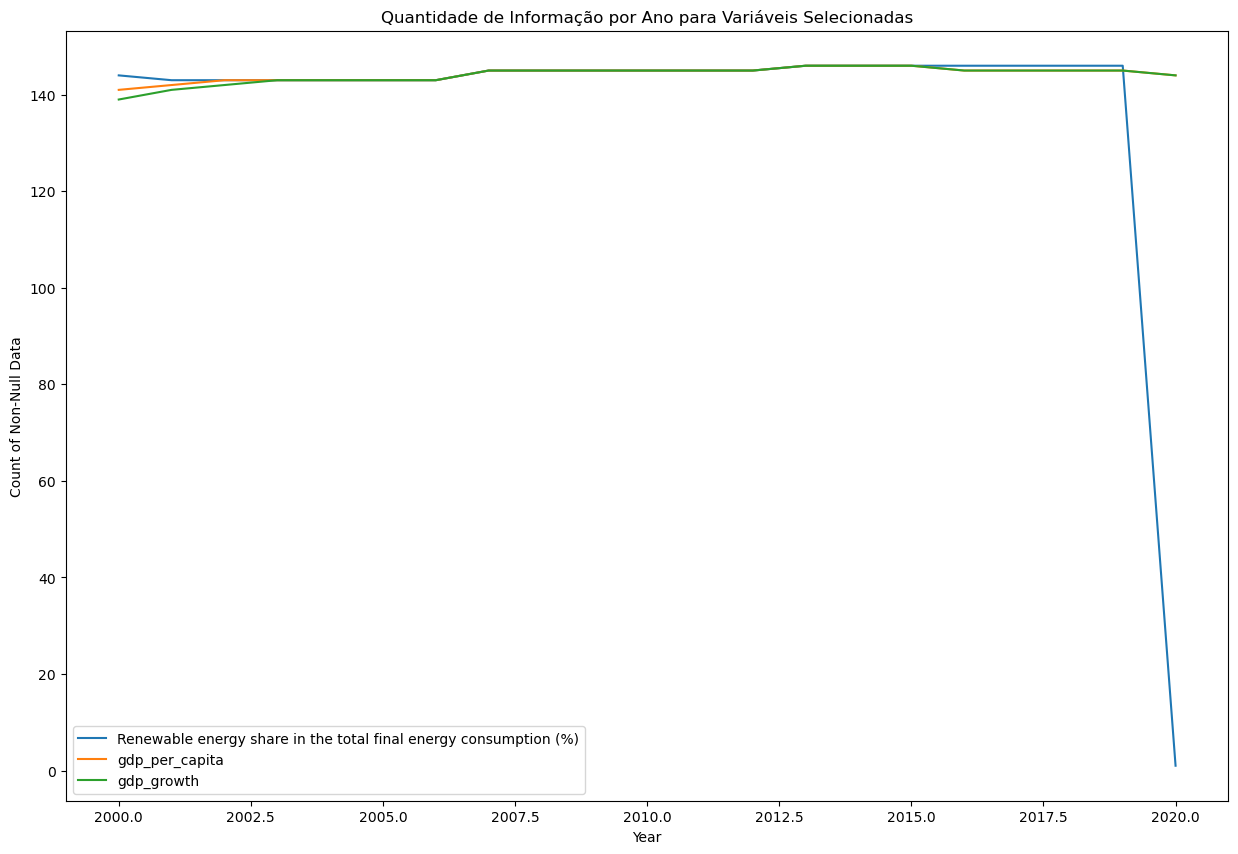

In [95]:
# Contagem de informações não nulas por ano para cada variável
contagem_info = data.groupby('Year')[variáveis_chave].count()

# Plotando o gráfico
plt.figure(figsize=(15, 10))
for var in variáveis_chave:
    plt.plot(contagem_info.index, contagem_info[var], label=var)

plt.xlabel('Year')
plt.ylabel('Count of Non-Null Data')
plt.title('Quantidade de Informação por Ano para Variáveis Selecionadas')
plt.legend()
plt.grid(False)
plt.show()

Sabemos, portanto, que não há dados do percentual de energia renovável para 2020, então precisaremos remover esse ano de nossa análise

In [96]:
# Remoção de 2020
data = data[data['Year'] != 2020]

# Analisando após a remoção
vazios = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
vazios = vazios.rename(columns = {0 : 'Null Values'})
vazios

,Null Values
Renewables (% equivalent primary energy),1679
Renewable-electricity-generating-capacity-per-capita,871
Value_co2_emissions_kt_by_country,126
Low-carbon electricity (% electricity),125
gdp_growth,117
Access to electricity (% of population),115
gdp_per_capita,113
Energy intensity level of primary energy (MJ/$2017 PPP GDP),110
Latitude,106
Land Area(Km2),106


In [97]:
# Calculando a quantidade de informações não nulas por país para as variáveis-chave
quantidade_info_por_pais = data.groupby('Entity')[variáveis_chave].count().sum(axis=1)

# Ordenando os países pela quantidade de informações não nulas, do maior para o menor
paises_por_quantidade_info = quantidade_info_por_pais.sort_values(ascending=False)

# Exibindo os resultados
print(paises_por_quantidade_info)

Entity
Zimbabwe                                                                                                                                      60
Guyana                                                                                                                                        60
Ghana                                                                                                                                         60
Greece                                                                                                                                        60
Grenada                                                                                                                                       60
                                                                                                                                              ..
Maldives,2009,99.9,91.25,4.63,450000,1.49,0.28,0,0,0,12835.753,2.29,910.0000262,,-7.228841465,6636.543871,"1,802",298,3.202

C:\Users\Felipe\AppData\Local\Temp\ipykernel_47164\3009424512.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


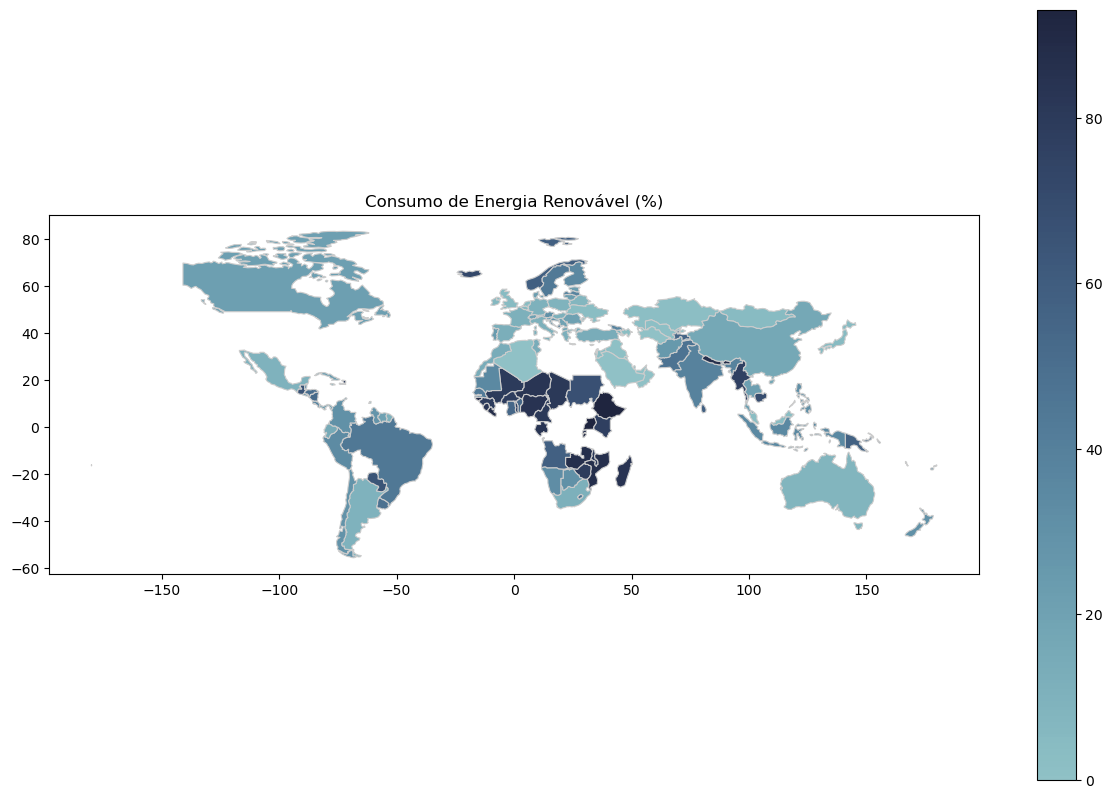

In [98]:
# Carregando um mapa mundial
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculando a média da capacidade de geração de energia renovável per capita por país
media_capacidade_energia_per_capta = data.groupby('Entity')['Renewable energy share in the total final energy consumption (%)'].mean()
energia_renovavel_mundial = mundo.set_index('name').join(media_capacidade_energia_per_capta)

cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
energia_renovavel_mundial.plot(column='Renewable energy share in the total final energy consumption (%)',
                            cmap=cores_mapa,
                            linewidth=0.8,
                            ax=ax,
                            edgecolor='0.8',
                            legend=True)
ax.set_title('Consumo de Energia Renovável (%)')
plt.show()

# 4. Verificação da Hipótese - Premissas
Vamos definir os países de análise para relacionarmos modelos especificos como teste de hipótese e análise temporal . Selecionaremos uma amostragem de 5 países.

In [99]:
# Selecionando 5 países aleatoriamente
np.random.seed(53)
paises_aleatorios = np.random.choice(data['Entity'].unique(), 5, replace=False).tolist()

# Combinando todas as listas em uma única array
paises_interesse = np.array(paises_aleatorios)

Precisamos encontrar a população para obter os dados de consumo total de energia.

In [100]:
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000.0,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60.0,652230.0,33.939110,67.709953
1,Afghanistan,2001.0,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60.0,652230.0,33.939110,67.709953
2,Afghanistan,2002.0,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60.0,652230.0,33.939110,67.709953
3,Afghanistan,2003.0,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60.0,652230.0,33.939110,67.709953
4,Afghanistan,2004.0,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60.0,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,2015.0,33.700000,29.5,63.54,0.0,80.82,4.02,0.0,5.37,...,3860.92020,10.36,12430.000310,NaN,1.779873,1445.069702,38.0,390757.0,-19.015438,29.154857
3644,Zimbabwe,2016.0,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017.0,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018.0,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857


# 4. Verificação da Hipótese - Correlação

Vamos começar a investigação dos dados fazendo uma análise de correlação entre o `Percentual de Energia Renovável` o  `PIB per capta` e o `Crescimento do PIB` 

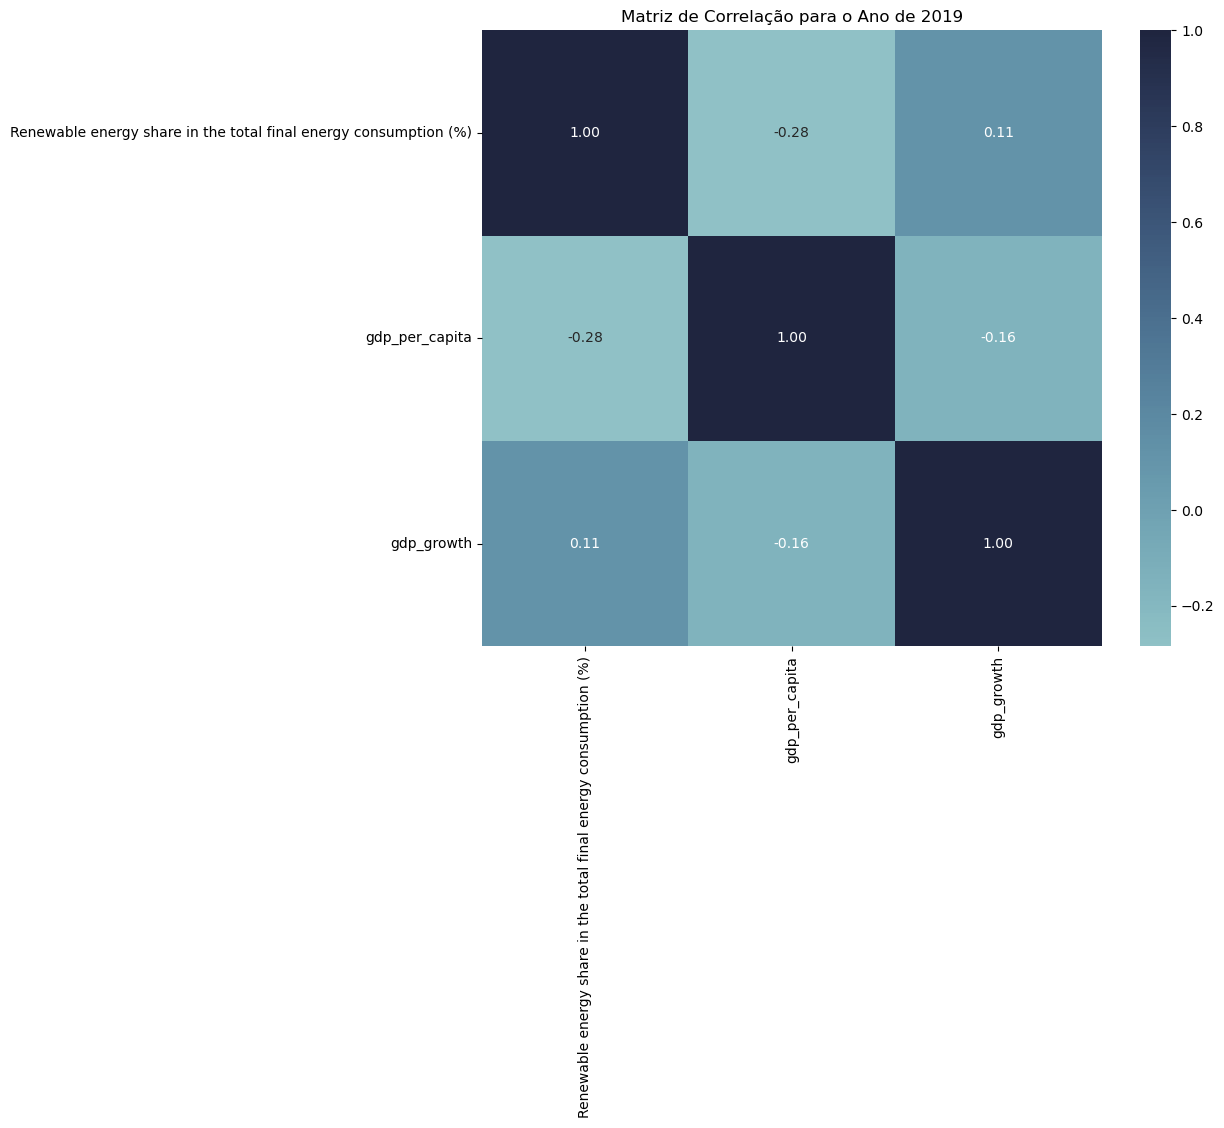

In [101]:
# Filtrando os dados para o ano mais recente com informações (2019)
data_2019 = data[data['Year'] == 2019]

# Matriz de correlação
matriz_correlacao = data_2019[variáveis_chave].corr()

# Criando matrizes de correlação
cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap=cores_mapa, fmt=".2f")
plt.title('Matriz de Correlação para o Ano de 2019')
plt.show()

Devemos nos ater, prioritariamente, à primeira coluna, no qual as variáveis estão em função do percentual de energia renovável.<br>
A matriz sugere que existe uma correlação negativa entre o uso de energia renovável e o PIB per capta, porém positiva em termos de crescimento do PIB. Como esse elemento é não implica causalidade e os coenficientes não são tão fortes, prosseguiremos com a análise. <br>

# 4. Verificação da Hipótese - Regressão Linear

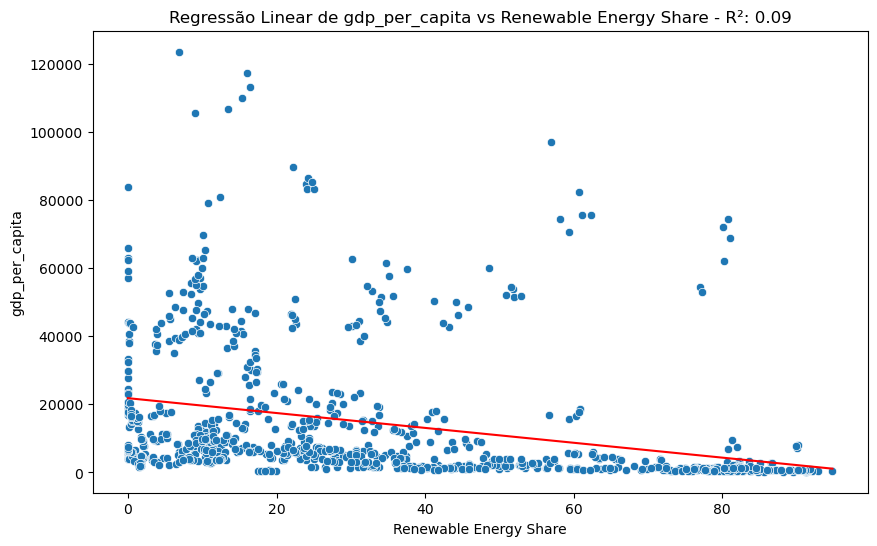

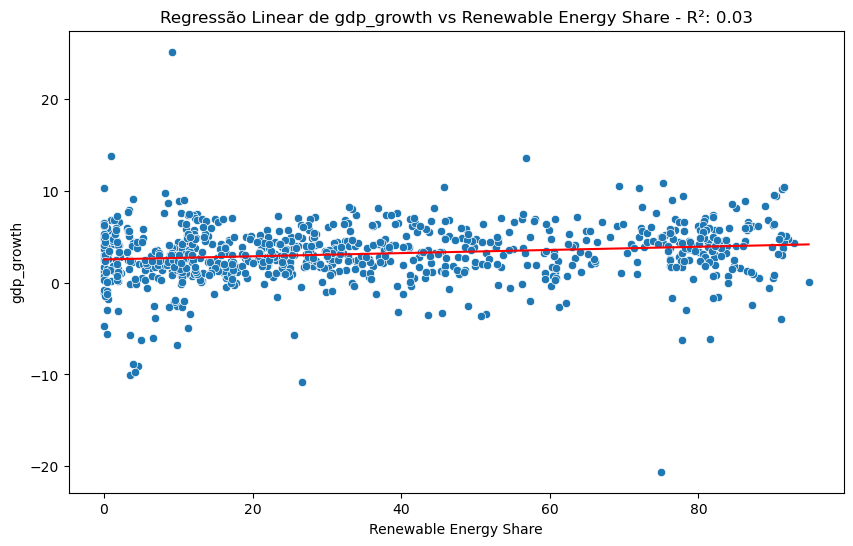

In [102]:
# Filtrando o dataset para os últimos 5 anos (2014-2019)
data_recente = data[(data['Year'] >= 2014) & (data['Year'] <= 2019)]

# Variável independente
x_var = 'Renewable energy share in the total final energy consumption (%)'

# Variáveis dependentes
y_vars = ['gdp_per_capita', 'gdp_growth']

# Regressão Linear Univarida para cada variável dependente
for y_var in y_vars:
    # Preparando os dados
    data_filtered = data_recente[[x_var, y_var]].dropna()
    X = data_filtered[[x_var]]
    y = data_filtered[y_var]

    # Criando e ajustando o modelo
    model = LinearRegression()
    model.fit(X, y)

    # Fazendo previsões
    y_pred = model.predict(X)

    # Calculando R²
    r2 = r2_score(y, y_pred)

    # Plotando gráfico de dispersão com linha de regressão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[x_var], y=y)
    sns.lineplot(x=X[x_var], y=y_pred, color='red')
    plt.title(f'Regressão Linear de {y_var} vs Renewable Energy Share - R²: {r2:.2f}')
    plt.xlabel('Renewable Energy Share')
    plt.ylabel(y_var)
    plt.show()

# 4. Verificação da Hipótese - Análise Temporal

# 4. Verificação da Hipótese - Teste de Hipótese

# 4. Verificação da Hipótese - Análise Comparativa

# 5. Conclusões